In [1]:
# import libraries for further usage of this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# load dataset of airbnb
survey = pd.read_csv("data/survey_results_public.csv")


In [3]:
# identify the non-numerical columns
cat_columns = survey.select_dtypes(include=['object']).columns
# print(cat_columns)
# 147 columns contains text value

In [4]:
# identify the numerical columns
num_columns = survey.select_dtypes(include=['float']).columns
print(num_columns)
# 147 columns contains text value

Index(['CareerSatisfaction', 'JobSatisfaction', 'HoursPerWeek',
       'StackOverflowSatisfaction', 'Salary', 'ExpectedSalary'],
      dtype='object')


In [5]:
# what are the unique values in a column
def unique_value(df,column):
    print(df[column].unique())

# list_of_interests = ['BuildingThings','LearningNewTech','ProblemSolving','AnnoyingUI','FriendsDevelopers','ChallengeMyself']
# assess_new_opp = ['AssessJobIndustry','AssessJobRole','AssessJobExp','EducationImportant','VersionControl','ProjectManagement']    
# for i in assess_new_opp:
    # unique_value(survey,i)


In [18]:
unique_value(survey,'Professional')
unique_value(survey,'ProgramHobby')
unique_value(survey,'EmploymentStatus')

['Student' 'Professional developer'
 'Professional non-developer who sometimes writes code'
 'Used to be a professional developer' 'None of these']
['Yes, both' 'Yes, I program as a hobby' 'No'
 'Yes, I contribute to open source projects']
['Not employed, and not looking for work' 'Employed part-time'
 'Employed full-time'
 'Independent contractor, freelancer, or self-employed'
 'Not employed, but looking for work' 'I prefer not to say' 'Retired']


# Q1: 
## How do certain personal interests, such as building things and problem solving, relate to job satisfaction? ##
## How do working environments affect job satisfaction? ##

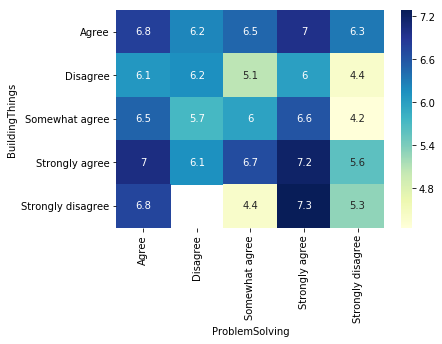

In [57]:
# how Problem Solving and Building Things affects / relates to job satisfaction
prob_build_satis = survey[survey['JobSatisfaction'].notnull()][['ProblemSolving','BuildingThings','JobSatisfaction']]
prob_build_satis = pd.pivot_table(prob_build_satis, 
                                values = 'JobSatisfaction', 
                                columns = 'ProblemSolving', 
                                index = 'BuildingThings',
                                aggfunc = np.mean)
# Need to reset the index and column order...
sns.heatmap(prob_build_satis, annot = True, cmap = "YlGnBu");

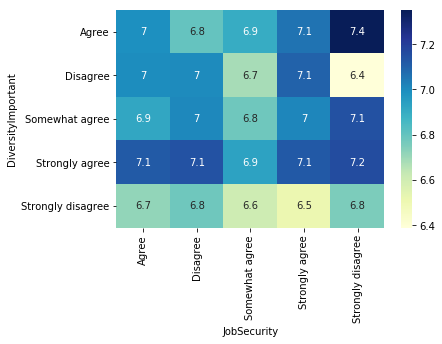

In [62]:
# how job security and diversity affects / relates to job satisfaction
secu_diver_satis = survey[survey['JobSatisfaction'].notnull()][['JobSecurity','DiversityImportant','JobSatisfaction']]
secu_diver_satis = pd.pivot_table(secu_diver_satis, 
                                values = 'JobSatisfaction', 
                                columns = 'JobSecurity', 
                                index = 'DiversityImportant',
                                aggfunc = np.mean)
# Need to reset the index and column order...
sns.heatmap(secu_diver_satis, annot = True, cmap = "YlGnBu");

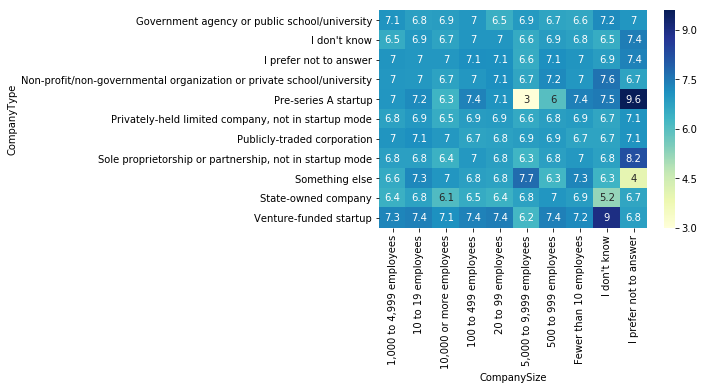

In [23]:
# how company size and company type affects / relates to job satisfaction
size_type_satis = survey[survey['JobSatisfaction'].notnull()][['CompanySize','CompanyType','JobSatisfaction']]
size_type_satis = pd.pivot_table(size_type_satis, 
                                values = 'JobSatisfaction', 
                                columns = 'CompanySize', 
                                index = 'CompanyType',
                                aggfunc = np.mean)
# print(size_type_satis.head())
sns.heatmap(size_type_satis, annot = True, cmap = "YlGnBu");

# Q2:
## How job satisfaction, career satisfaction, weekly hour, salary correlate to each other?

In [14]:
# get a dataset contains job satisfaction, career satisfaction, weekly hour, and salary.
satisf_corr = survey[['JobSatisfaction','CareerSatisfaction','HoursPerWeek','Salary']]
# drop null value in the dataset
satisf_corr_dropna = satisf_corr.dropna(axis=0, how='any', subset=['JobSatisfaction','CareerSatisfaction','HoursPerWeek','Salary'])


   Job_Career  Job_Hour  Job_Salary  Career_Salary
0    0.645803 -0.081532    0.120765       0.158223


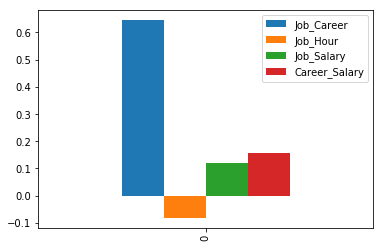

In [16]:
# check how each pair correlates
JobSat_CareerSat = satisf_corr['JobSatisfaction'].corr(satisf_corr['CareerSatisfaction'])
# print(JobSat_CareerSat)
JobSat_Hour = satisf_corr['JobSatisfaction'].corr(satisf_corr['HoursPerWeek'])
# print(JobSat_Hour)
JobSat_Sal = satisf_corr['JobSatisfaction'].corr(satisf_corr['Salary'])
# print(JobSat_Sal)
Car_Sal = satisf_corr['CareerSatisfaction'].corr(satisf_corr['Salary'])
# print(Car_Sal)

corr = {'Job_Career': [JobSat_CareerSat],'Job_Hour':[JobSat_Hour],'Job_Salary':[JobSat_Sal],'Career_Salary':[Car_Sal]}
df_corr = pd.DataFrame(data = corr)
print(df_corr)
df_corr.plot(kind='bar');

# Q3:
## Do serious developers have a better job satisfaction or pay?

In [21]:
# Q3:
# How developer perceive themselves how seriously at work?
serious_at_work = survey['SeriousWork'].dropna(axis=0)
print(serious_at_work.value_counts()/serious_at_work.shape[0])
# Over 80% of the developer consider themselves serious at work (Agree + Strongly agree)

Agree                0.480783
Strongly agree       0.328497
Somewhat agree       0.159928
Disagree             0.025924
Strongly disagree    0.004869
Name: SeriousWork, dtype: float64


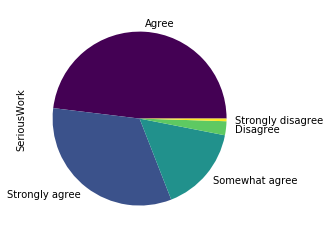

In [28]:
serious_at_work.value_counts().plot(kind='pie',colormap='viridis');

In [43]:
# Do serious developer has a higer job satisfaction or higher salary?

Agree                14911
Strongly agree       10188
Somewhat agree        4960
Disagree               804
Strongly disagree      151
Name: SeriousWork, dtype: int64

In [30]:
serious = survey[['SeriousWork','JobSatisfaction','Salary']].dropna(axis=0, how='any')
print(serious.shape)

(8844, 3)


In [31]:
def serious_cat(serious_type):
    if serious_type in ['Agree','Strong agree']:
        return 'Serious'
    else:
        return 'Non-serious'

In [32]:
# Adding serious category column ['SeriousCat] to the dataframe
serious['SeriousCat'] = serious['SeriousWork'].apply(lambda x : serious_cat(x))

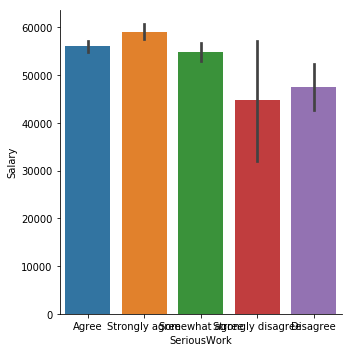

In [43]:
sns.catplot(data=serious,x='SeriousWork',y='Salary',kind='bar');

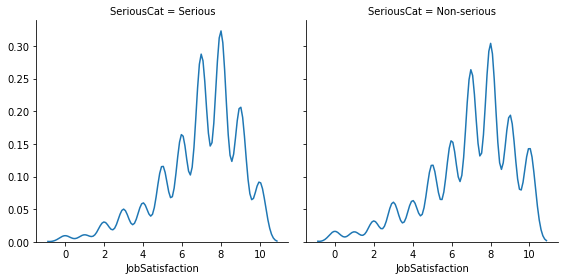

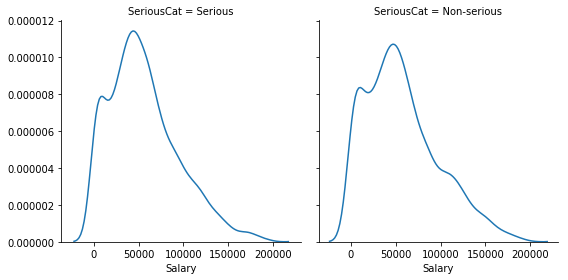

In [34]:
g1 = sns.FacetGrid(serious,col='SeriousCat',height=4)
g1.map(sns.kdeplot,'JobSatisfaction');
g2 = sns.FacetGrid(serious,col='SeriousCat',height=4)
g2.map(sns.kdeplot,'Salary');
